### Upload AB 5.zip and roiData.zip

In [1]:
!pip install read-roi

  Preparing metadata (setup.py) ... done
  Created wheel for read-roi: filename=read_roi-1.6.0-py2.py3-none-any.whl size=8019 sha256=62c78d28546474857717e91c7b48445739bd3d591e06b82e32027cb105cdbdcb
  Stored in directory: /root/.cache/pip/wheels/09/67/72/4903ef58791d5330f9946373f84126b8b79027879ac828702e
Successfully built read-roi


In [4]:
from read_roi import read_roi_file as rf
from read_roi import read_roi_zip as rz

In [5]:
rois = rz("/content/AB 5.zip")


In [6]:
type(rois)

collections.OrderedDict

In [7]:
rois.keys()

odict_keys(['0220-0393', '0216-0391', '0200-0356', '0205-0406', '0200-0317', '0224-0359', '0246-0362', '0207-0333', '0212-0339', '0203-0419', '0215-0392', '0203-0383', '0245-0412', '0220-0347', '0232-0394', '0229-0379', '0222-0342', '0192-0342', '0192-0414', '0193-0426', '0238-0384', '0192-0359', '0239-0359', '0233-0362', '0227-0302', '0202-0294', '0204-0304', '0192-0294', '0196-0261', '0233-0344', '0227-0339', '0236-0314', '0249-0397', '0255-0413', '0260-0423', '0239-0287', '0250-0326', '0226-0242', '0247-0303', '0220-0280', '0198-0197', '0244-0264', '0209-0230', '0209-0229', '0249-0202', '0251-0230', '0228-0225', '0220-0185', '0204-0156', '0252-0297', '0255-0334', '0215-0306', '0218-0196', '0242-0155', '0221-0255', '0239-0166', '0213-0153', '0249-0271', '0227-0204', '0231-0193', '0250-0155', '0242-0225', '0241-0247', '0247-0242', '0215-0184', '0198-0140', '0254-0318', '0250-0150', '0216-0169', '0225-0163', '0257-0174', '0250-0170', '0251-0209', '0223-0195', '0244-0240', '0239-0160', 

In [8]:
rois['0220-0393'].keys()

dict_keys(['type', 'x', 'y', 'n', 'width', 'name', 'position'])

In [9]:
def get_unique_n_values(rois):
    """
    Get all unique 'n' values from the ROIs.

    Args:
    rois (dict): Dictionary containing ROI data.

    Returns:
    set: A set of unique 'n' values.
    """
    unique_n_values = set()
    for roi in rois.values():
        if 'n' in roi:
            unique_n_values.add(roi['n'])
    return unique_n_values

# Example usage:
# unique_n = get_unique_n_values(rois)
# print(f"Unique 'n' values: {unique_n}")

In [10]:
# get_unique_n_values(rois)

In [11]:
def create_xy_pairs(rois):
    """
    Create lists of x,y pairs corresponding to each ROI name.

    Args:
    rois (dict): Dictionary containing ROI data.

    Returns:
    dict: A dictionary with ROI names as keys and lists of (x,y) tuples as values.
    """
    xy_pairs = {}
    for name, roi in rois.items():
        if 'x' in roi and 'y' in roi:
            # Ensure x and y are lists and have the same length
            if isinstance(roi['x'], (int, float)):
                x_coords = [roi['x']]
                y_coords = [roi['y']]
            else:
                x_coords = roi['x']
                y_coords = roi['y']

            if len(x_coords) != len(y_coords):
                print(f"Warning: ROI '{name}' has mismatched number of x and y coordinates.")
                continue

            xy_pairs[name] = list(zip(x_coords, y_coords))
        else:
            print(f"Warning: ROI '{name}' is missing 'x' or 'y' coordinates.")

    return xy_pairs

# Example usage:
xy_coords = create_xy_pairs(rois)
for name, coords in list(xy_coords.items())[:5]:  # Print first 5 for brevity
    print(f"ROI: {name}")
    print(f"Coordinates: {coords}")
    print()

ROI: 0220-0393
Coordinates: [(426.5, 242.25), (426.5, 242.5), (426.25, 242.5), (426.25, 242.25), (426.0, 242.25), (426.0, 242.0), (425.75, 241.75), (425.75, 241.5), (425.5, 241.5), (425.5, 241.25), (425.25, 241.25), (425.25, 241.0), (425.0, 241.0), (425.0, 240.75), (425.0, 240.5), (424.75, 240.5), (424.75, 240.25), (424.5, 240.25), (424.5, 240.0), (424.25, 239.75), (424.25, 239.5), (424.0, 239.5), (424.0, 239.25), (423.75, 239.25), (423.75, 239.0), (423.5, 239.0), (423.5, 238.75), (423.5, 238.5), (423.25, 238.5), (423.25, 238.25), (423.0, 238.25), (423.0, 238.0), (422.75, 238.0), (422.75, 237.75), (422.5, 237.75), (422.5, 237.5), (422.25, 237.5), (422.25, 237.25), (422.0, 237.0), (421.75, 236.75), (421.5, 236.75), (421.5, 236.5), (421.25, 236.5), (421.25, 236.25), (421.0, 236.25), (421.0, 236.0), (420.75, 235.75), (420.5, 235.5), (420.25, 235.5), (420.25, 235.25), (420.0, 235.0), (419.75, 234.75), (419.5, 234.5), (419.5, 234.25), (419.25, 234.25), (419.25, 234.0), (419.0, 234.0), (419.

In [12]:
xy_coords.keys()

dict_keys(['0220-0393', '0216-0391', '0200-0356', '0205-0406', '0200-0317', '0224-0359', '0246-0362', '0207-0333', '0212-0339', '0203-0419', '0215-0392', '0203-0383', '0245-0412', '0220-0347', '0232-0394', '0229-0379', '0222-0342', '0192-0342', '0192-0414', '0193-0426', '0238-0384', '0192-0359', '0239-0359', '0233-0362', '0227-0302', '0202-0294', '0204-0304', '0192-0294', '0196-0261', '0233-0344', '0227-0339', '0236-0314', '0249-0397', '0255-0413', '0260-0423', '0239-0287', '0250-0326', '0226-0242', '0247-0303', '0220-0280', '0198-0197', '0244-0264', '0209-0230', '0209-0229', '0249-0202', '0251-0230', '0228-0225', '0220-0185', '0204-0156', '0252-0297', '0255-0334', '0215-0306', '0218-0196', '0242-0155', '0221-0255', '0239-0166', '0213-0153', '0249-0271', '0227-0204', '0231-0193', '0250-0155', '0242-0225', '0241-0247', '0247-0242', '0215-0184', '0198-0140', '0254-0318', '0250-0150', '0216-0169', '0225-0163', '0257-0174', '0250-0170', '0251-0209', '0223-0195', '0244-0240', '0239-0160', '

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rois(xy_coords, roi_names=None, image_size=(512, 512)):
    """
    Plot one or multiple ROIs on a black image.

    Args:
    xy_coords (dict or list): Either a dictionary of ROI coordinates or a list of (x, y) pairs for a single ROI.
    roi_names (str or list, optional): Name(s) of the ROI(s) to plot. If None, plot all ROIs in xy_coords.
    image_size (tuple, optional): Size of the image (height, width). Default is (512, 512).

    Returns:
    None: Displays the plot.
    """
    # Create a black background
    img = np.zeros(image_size)

    # Create a new figure
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')

    # Define a color cycle for multiple ROIs
    colors = plt.cm.rainbow(np.linspace(0, 1, 10))

    # Check if we're dealing with a single ROI or multiple ROIs
    if isinstance(xy_coords, list):
        # Single ROI
        x, y = zip(*xy_coords)
        plt.plot(x, y, '-o', color=colors[0], linewidth=1, markersize=4)
        plt.title(f"ROI: {roi_names if roi_names else 'Unnamed'}")
    else:
        # Multiple ROIs
        if roi_names is None:
            roi_names = list(xy_coords.keys())
        elif isinstance(roi_names, str):
            roi_names = [roi_names]

        for i, roi_name in enumerate(roi_names):
            if roi_name in xy_coords:
                x, y = zip(*xy_coords[roi_name])
                plt.plot(x, y, '-o', color=colors[i % len(colors)], linewidth=1, markersize=4, label=roi_name)
            else:
                print(f"Warning: ROI '{roi_name}' not found in the provided coordinates.")

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title("Multiple ROIs")

    plt.xlim(0, image_size[1])
    plt.ylim(image_size[0], 0)  # Invert y-axis to match image coordinates
    plt.tight_layout()
    plt.show()

# Example usage:
# For a single ROI
# plot_rois(xy_coords['0220-0393'], '0220-0393')

# For multiple ROIs
# plot_rois(xy_coords, ['0220-0393', '0220-0394', '0220-0395'])

# For all ROIs
# plot_rois(xy_coords)

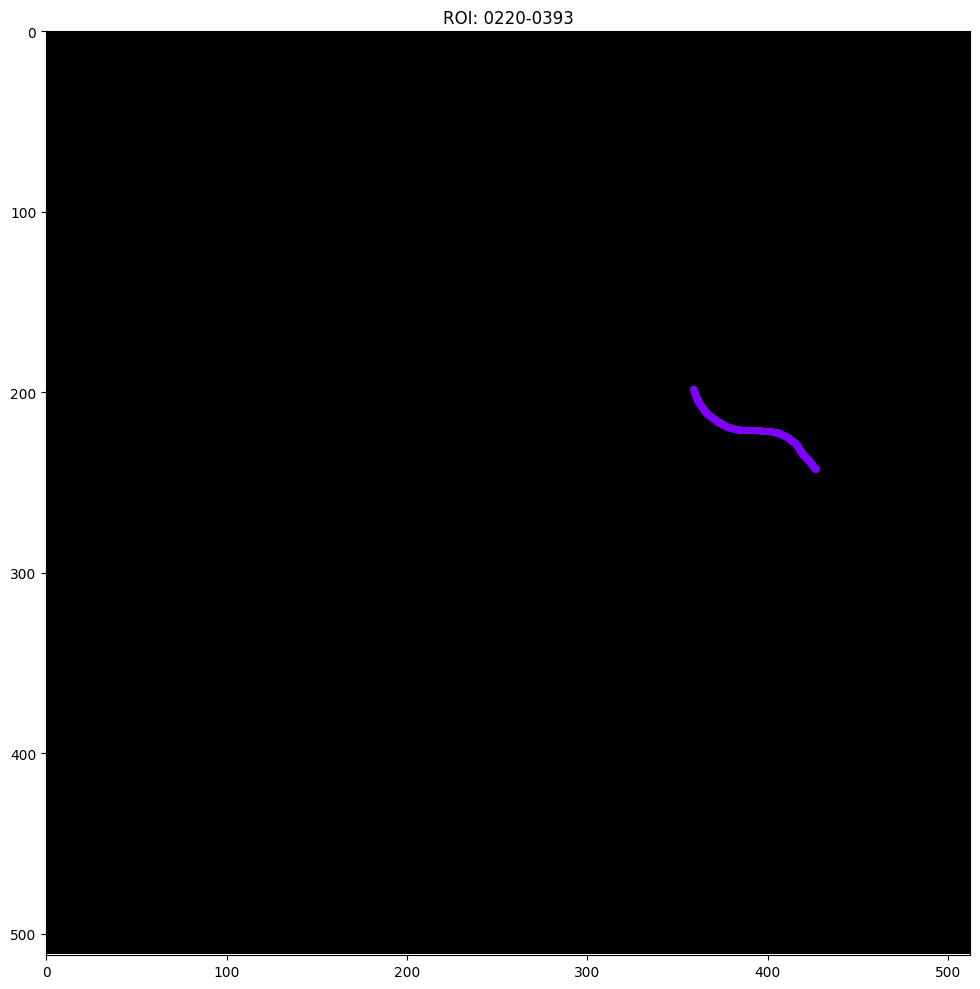

In [14]:
# Example usage:
# For a single ROI
plot_rois(xy_coords['0220-0393'], '0220-0393')


In [15]:
xy_coords.keys()

dict_keys(['0220-0393', '0216-0391', '0200-0356', '0205-0406', '0200-0317', '0224-0359', '0246-0362', '0207-0333', '0212-0339', '0203-0419', '0215-0392', '0203-0383', '0245-0412', '0220-0347', '0232-0394', '0229-0379', '0222-0342', '0192-0342', '0192-0414', '0193-0426', '0238-0384', '0192-0359', '0239-0359', '0233-0362', '0227-0302', '0202-0294', '0204-0304', '0192-0294', '0196-0261', '0233-0344', '0227-0339', '0236-0314', '0249-0397', '0255-0413', '0260-0423', '0239-0287', '0250-0326', '0226-0242', '0247-0303', '0220-0280', '0198-0197', '0244-0264', '0209-0230', '0209-0229', '0249-0202', '0251-0230', '0228-0225', '0220-0185', '0204-0156', '0252-0297', '0255-0334', '0215-0306', '0218-0196', '0242-0155', '0221-0255', '0239-0166', '0213-0153', '0249-0271', '0227-0204', '0231-0193', '0250-0155', '0242-0225', '0241-0247', '0247-0242', '0215-0184', '0198-0140', '0254-0318', '0250-0150', '0216-0169', '0225-0163', '0257-0174', '0250-0170', '0251-0209', '0223-0195', '0244-0240', '0239-0160', '

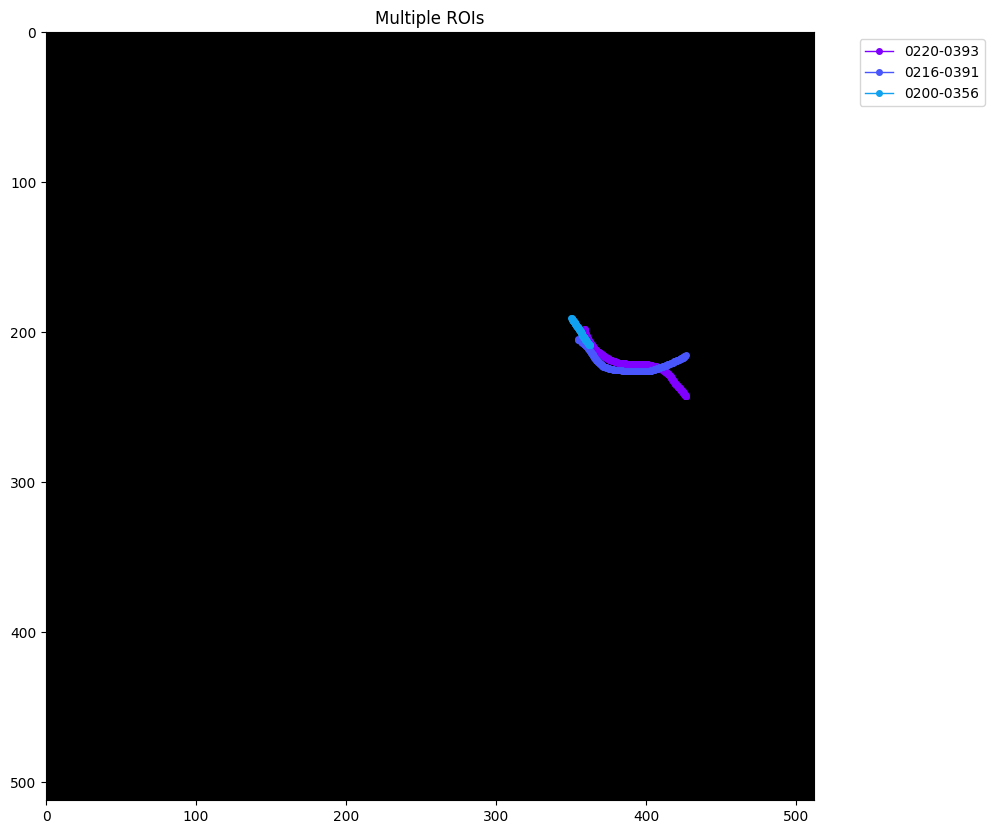

In [16]:
# For multiple ROIs
plot_rois(xy_coords, ['0220-0393', '0216-0391', '0200-0356'])


<ipython-input-13-b99e05aa735f>:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


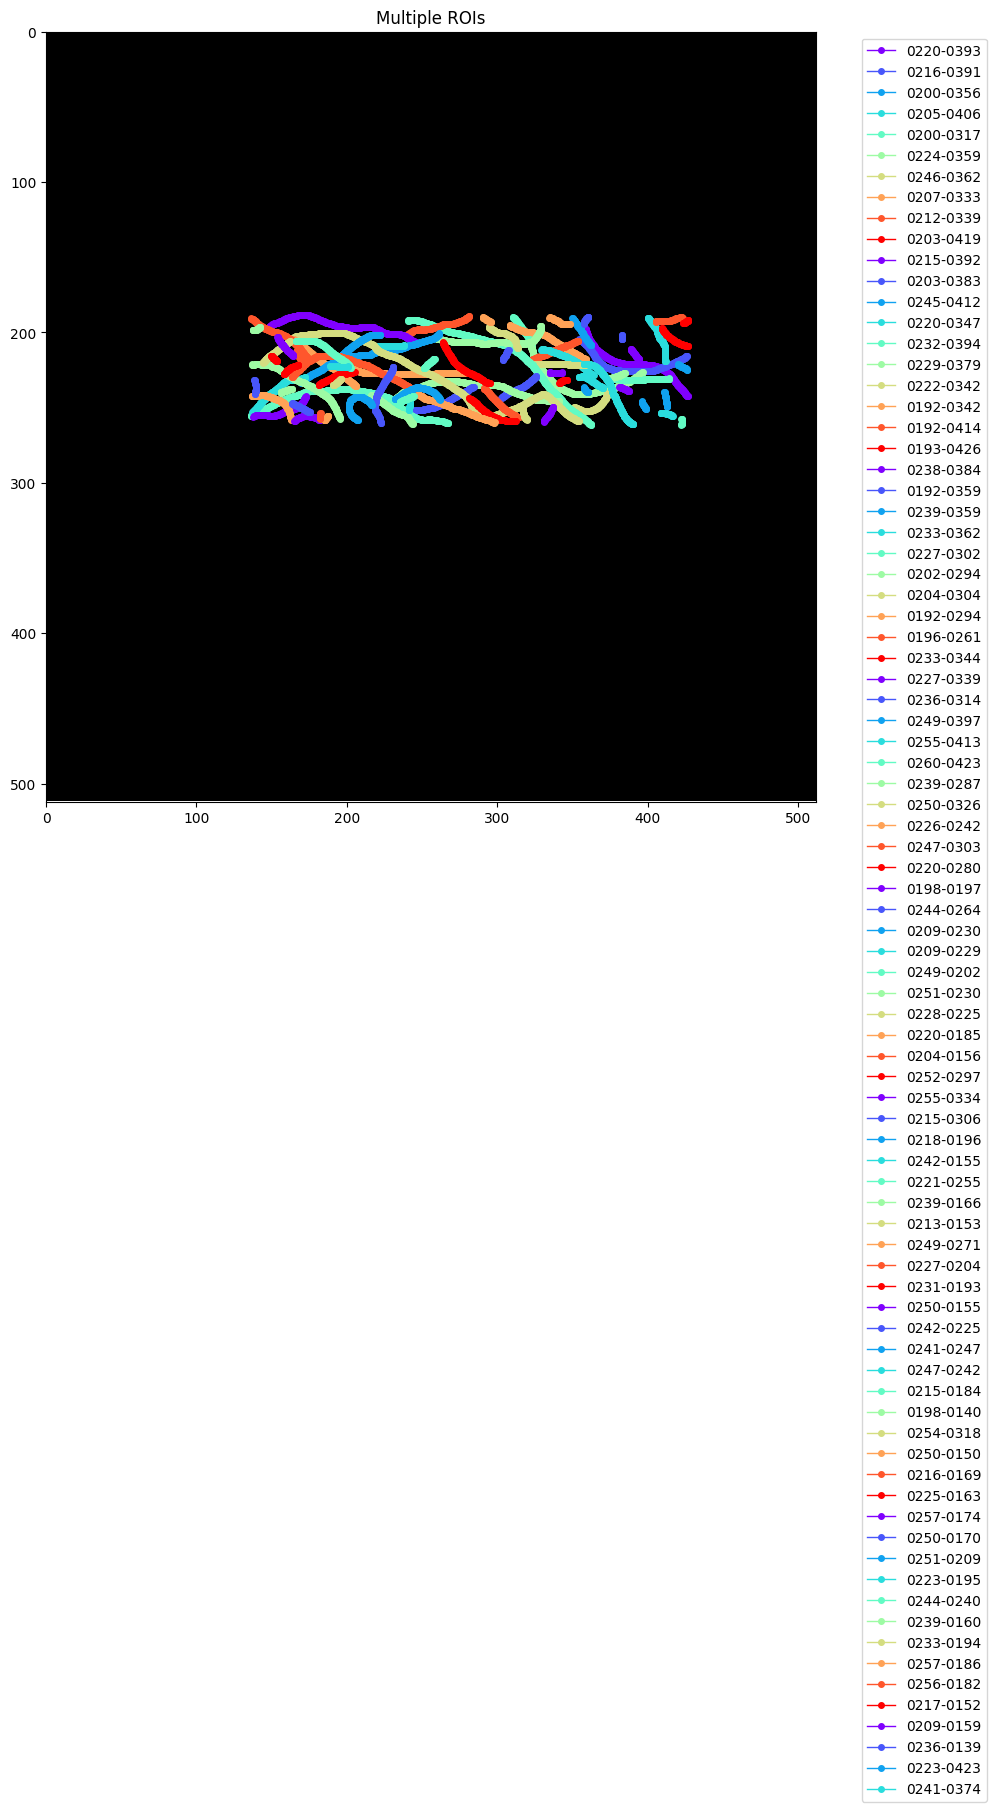

In [17]:
# For all ROIs
plot_rois(xy_coords)

Unique 'n' values: {129, 260, 134, 137, 139, 655, 16, 17, 19, 149, 279, 151, 409, 23, 25, 27, 283, 30, 159, 410, 33, 155, 163, 37, 38, 40, 169, 42, 41, 302, 47, 48, 689, 50, 179, 49, 181, 309, 182, 52, 57, 60, 189, 63, 321, 196, 197, 455, 72, 201, 458, 71, 204, 79, 80, 337, 338, 83, 213, 85, 96, 612, 233, 107, 111, 368, 115, 117, 245, 376, 122, 507}


<ipython-input-18-0da4d5395ccf>:111: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=0.5)


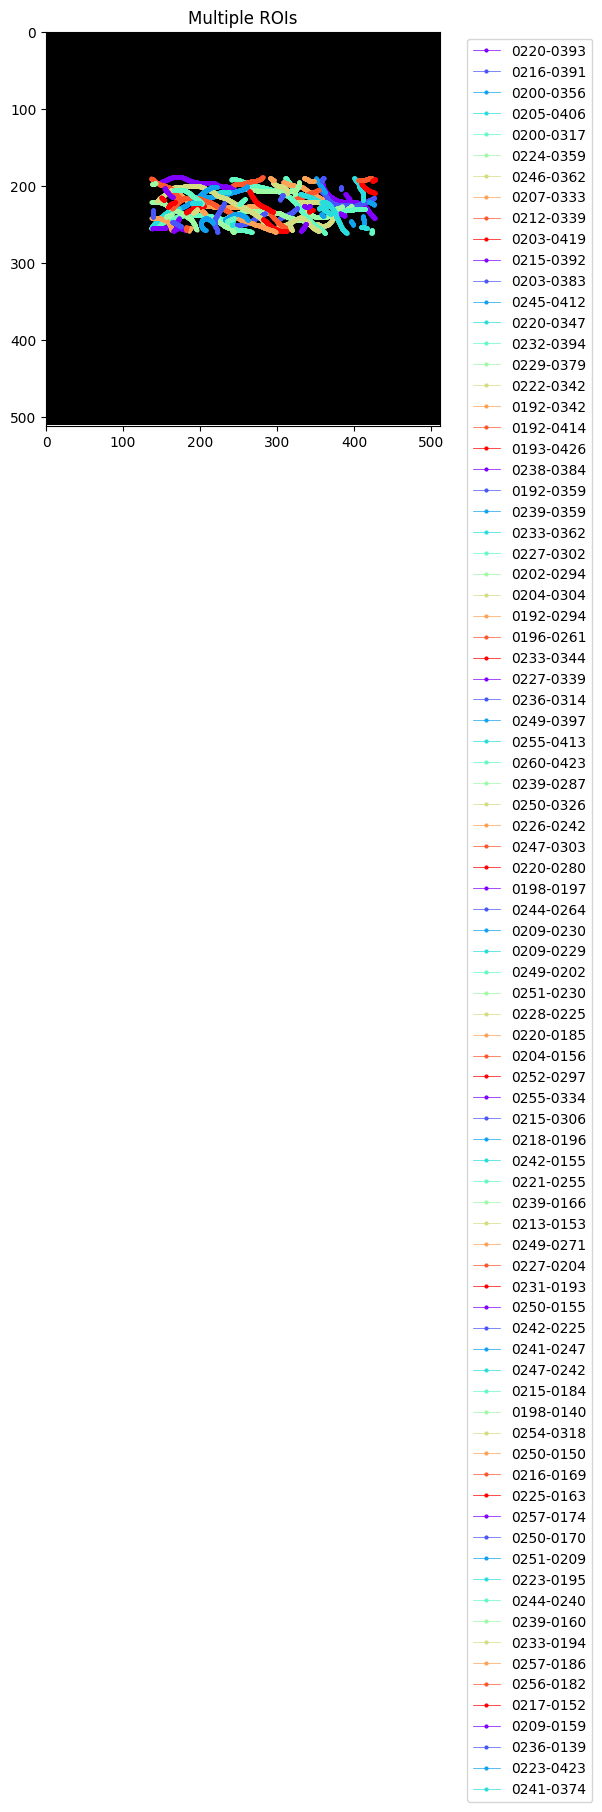

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def read_roi_files(file_path):
    """
    Read ROI files and return the ROI data.

    Args:
    file_path (str): Path to the ROI file.

    Returns:
    dict: Dictionary containing ROI data.
    """
    return read_roi_file(file_path)

def get_unique_n_values(rois):
    """
    Get unique 'n' values from ROIs.

    Args:
    rois (dict): Dictionary containing ROI data.

    Returns:
    set: Set of unique 'n' values.
    """
    return set(roi['n'] for roi in rois.values() if 'n' in roi)

def create_xy_pairs(rois):
    """
    Create lists of x,y pairs corresponding to each ROI name.

    Args:
    rois (dict): Dictionary containing ROI data.

    Returns:
    dict: A dictionary with ROI names as keys and lists of (x,y) tuples as values.
    """
    xy_pairs = {}
    for name, roi in rois.items():
        if 'x' in roi and 'y' in roi:
            # Ensure x and y are lists and have the same length
            if isinstance(roi['x'], (int, float)):
                x_coords = [roi['x']]
                y_coords = [roi['y']]
            else:
                x_coords = roi['x']
                y_coords = roi['y']

            if len(x_coords) != len(y_coords):
                print(f"Warning: ROI '{name}' has mismatched number of x and y coordinates.")
                continue

            xy_pairs[name] = list(zip(x_coords, y_coords))
        else:
            print(f"Warning: ROI '{name}' is missing 'x' or 'y' coordinates.")

    return xy_pairs

def plot_rois(xy_coords, roi_names=None, image_size=(512, 512)):
    """
    Plot one or multiple ROIs on a black image.

    Args:
    xy_coords (dict or list): Either a dictionary of ROI coordinates or a list of (x, y) pairs for a single ROI.
    roi_names (str or list, optional): Name(s) of the ROI(s) to plot. If None, plot all ROIs in xy_coords.
    image_size (tuple, optional): Size of the image (height, width). Default is (512, 512).

    Returns:
    None: Displays the plot.
    """
    # Create a black background
    img = np.zeros(image_size)

    # Calculate figure size in inches
    dpi = 100
    figsize = (image_size[1] / dpi, image_size[0] / dpi)

    # Create a new figure with exact pixel size
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.imshow(img, cmap='gray')

    # Define a color cycle for multiple ROIs
    colors = plt.cm.rainbow(np.linspace(0, 1, 10))

    # Check if we're dealing with a single ROI or multiple ROIs
    if isinstance(xy_coords, list):
        # Single ROI
        x, y = zip(*xy_coords)
        ax.plot(x, y, '-o', color=colors[0], linewidth=0.5, markersize=2)
        ax.set_title(f"ROI: {roi_names if roi_names else 'Unnamed'}")
    else:
        # Multiple ROIs
        if roi_names is None:
            roi_names = list(xy_coords.keys())
        elif isinstance(roi_names, str):
            roi_names = [roi_names]

        for i, roi_name in enumerate(roi_names):
            if roi_name in xy_coords:
                x, y = zip(*xy_coords[roi_name])
                ax.plot(x, y, '-o', color=colors[i % len(colors)], linewidth=0.5, markersize=2, label=roi_name)
            else:
                print(f"Warning: ROI '{roi_name}' not found in the provided coordinates.")

        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.set_title("Multiple ROIs")

    ax.set_xlim(0, image_size[1])
    ax.set_ylim(image_size[0], 0)  # Invert y-axis to match image coordinates
    plt.tight_layout(pad=0.5)
    plt.subplots_adjust(right=0.9)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Example usage
    file_path = "/content/AB 5.zip"
    rois = rz(file_path)

    unique_n_values = get_unique_n_values(rois)
    print("Unique 'n' values:", unique_n_values)

    xy_coords = create_xy_pairs(rois)

    # Plot a single ROI
    # plot_rois(xy_coords['0220-0393'], '0220-0393')

    # Plot multiple specific ROIs
    # plot_rois(xy_coords, ['0220-0393', '0220-0394', '0220-0395'])

    # Plot all ROIs
    plot_rois(xy_coords)

In [ ]:
# !mkdir roi_data
# !cp AB*.zip BB*.zip roi_data/

## uploaded roiData folder
# -> !unzip roiData.zip

In [19]:
!unzip roiData.zip

Archive:  roiData.zip
   creating: roiData/
  inflating: __MACOSX/._roiData      
  inflating: roiData/AB 24.zip       
  inflating: __MACOSX/roiData/._AB 24.zip  
  inflating: roiData/AB 5.zip        
  inflating: __MACOSX/roiData/._AB 5.zip  
  inflating: roiData/AB 31.zip       
  inflating: __MACOSX/roiData/._AB 31.zip  
  inflating: roiData/.DS_Store       
  inflating: __MACOSX/roiData/._.DS_Store  
  inflating: roiData/BB 54.zip       
  inflating: __MACOSX/roiData/._BB 54.zip  
  inflating: roiData/BB 18.zip       
  inflating: __MACOSX/roiData/._BB 18.zip  
  inflating: roiData/AB 51.zip       
  inflating: __MACOSX/roiData/._AB 51.zip  
  inflating: roiData/Extraction of ground truth data in FIJI.docx  
  inflating: __MACOSX/roiData/._Extraction of ground truth data in FIJI.docx  
  inflating: roiData/BB 26.zip       
  inflating: __MACOSX/roiData/._BB 26.zip  
  inflating: roiData/BB 20.zip       
  inflating: __MACOSX/roiData/._BB 20.zip  
  inflating: roiData/AB 68.zip    

In [20]:
import os
import glob
import json
from read_roi import read_roi_zip

def process_roi_zip_files(directory_path):
    """
    Process all ROI zip files in the given directory and store the xy coordinates in a JSON format.

    Args:
    directory_path (str): Path to the directory containing ROI zip files.

    Returns:
    dict: A dictionary containing ROI data for each file, suitable for JSON serialization.
    """
    roi_data = {}

    # Use glob to find all zip files in the directory
    zip_files = glob.glob(os.path.join(directory_path, "*.zip"))

    for zip_file in zip_files:
        # Get the filename without extension to use as a key
        file_key = os.path.splitext(os.path.basename(zip_file))[0]

        # Read ROIs from the zip file
        rois = read_roi_zip(zip_file)

        # Process ROIs and extract xy coordinates
        file_roi_data = {}
        for roi_name, roi_info in rois.items():
            if 'x' in roi_info and 'y' in roi_info:
                # Ensure x and y are lists
                x_coords = roi_info['x'] if isinstance(roi_info['x'], list) else [roi_info['x']]
                y_coords = roi_info['y'] if isinstance(roi_info['y'], list) else [roi_info['y']]

                # Create list of [x, y] pairs
                xy_coords = list(zip(x_coords, y_coords))

                file_roi_data[roi_name] = xy_coords

        # Store the data for this file
        roi_data[file_key] = file_roi_data

    return roi_data

# Example usage:
if __name__ == "__main__":
    directory_path = "/content/roiData"
    all_roi_data = process_roi_zip_files(directory_path)

    # Save to JSON file
    with open("roi_data_full.json", "w") as json_file:
        json.dump(all_roi_data, json_file, indent=2)

    print("ROI data has been processed and saved to roi_data.json")

ROI data has been processed and saved to roi_data.json


In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np

def read_roi_json(json_file_path):
    """
    Read ROI data from a JSON file.

    Args:
    json_file_path (str): Path to the JSON file containing ROI data.

    Returns:
    dict: The ROI data as a dictionary.
    """
    with open(json_file_path, 'r') as f:
        roi_data = json.load(f)
    return roi_data

def plot_roi_data(roi_data, file_names=None, image_size=(512, 512)):
    """
    Plot ROI data for specified file names.

    Args:
    roi_data (dict): Dictionary containing ROI data.
    file_names (str or list, optional): Name(s) of the file(s) to plot. If None, plot all files.
    image_size (tuple, optional): Size of the image (height, width). Default is (512, 512).

    Returns:
    None: Displays the plot(s).
    """
    # If file_names is not specified, use all files in the data
    if file_names is None:
        file_names = list(roi_data.keys())
    elif isinstance(file_names, str):
        file_names = [file_names]

    # Filter out any file names that are not in the data
    file_names = [f for f in file_names if f in roi_data]

    if not file_names:
        print("No valid file names provided.")
        return

    # Set up the plot
    n_files = len(file_names)
    n_cols = min(3, n_files)  # Max 3 columns
    n_rows = (n_files - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), squeeze=False)
    fig.suptitle("ROI Plots", fontsize=16)

    # Color cycle for ROIs
    colors = plt.cm.rainbow(np.linspace(0, 1, 10))

    for i, file_name in enumerate(file_names):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col]

        # Create a black background
        img = np.zeros(image_size)
        ax.imshow(img, cmap='gray')

        # Plot ROIs for this file
        file_data = roi_data[file_name]
        for j, (roi_name, coordinates) in enumerate(file_data.items()):
            x, y = zip(*coordinates)
            ax.plot(x, y, '-o', color=colors[j % len(colors)], linewidth=0.5, markersize=2, label=roi_name)

        ax.set_xlim(0, image_size[1])
        ax.set_ylim(image_size[0], 0)  # Invert y-axis to match image coordinates
        ax.set_title(file_name)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')

    # Remove any unused subplots
    for i in range(n_files, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

# Example usage:
"""
if __name__ == "__main__":
    json_file_path = "roi_data.json"

    # Read the ROI data
    roi_data = read_roi_json(json_file_path)

    # Plot all files
    plot_roi_data(roi_data)

    # Plot a single file
    # plot_roi_data(roi_data, "AB 5")

    # Plot multiple specific files
    # plot_roi_data(roi_data, ["AB 5", "BB 10"])
"""

'\nif __name__ == "__main__":\n    json_file_path = "roi_data.json"\n\n    # Read the ROI data\n    roi_data = read_roi_json(json_file_path)\n\n    # Plot all files\n    plot_roi_data(roi_data)\n\n    # Plot a single file\n    # plot_roi_data(roi_data, "AB 5")\n\n    # Plot multiple specific files\n    # plot_roi_data(roi_data, ["AB 5", "BB 10"])\n'

In [ ]:
# !rm -rf BB*.zip

# Synthetic Data Generation Method (Others)

In [ ]:
import json
import numpy as np
from collections import defaultdict
import random

def generate_bootstrap_synthetic_data(json_file_path, num_synthetic_images=5):
    """
    Generate synthetic ROI data using bootstrapping from existing filaments.

    Args:
    json_file_path (str): Path to the JSON file containing original ROI data.
    num_synthetic_images (int): Number of synthetic images to generate.

    Returns:
    dict: A dictionary containing the synthetic ROI data.
    """
    # Read the original data
    with open(json_file_path, 'r') as f:
        original_data = json.load(f)

    # Extract all filaments and their lengths
    all_filaments = []
    filament_counts = []
    for file_data in original_data.values():
        filament_counts.append(len(file_data))
        for coordinates in file_data.values():
            all_filaments.append(coordinates)

    # Generate synthetic data
    synthetic_data = {}
    for i in range(num_synthetic_images):
        file_name = f"Synthetic_File_{i+1}"

        # Sample the number of filaments for this synthetic image
        num_filaments = np.random.choice(filament_counts)

        file_data = {}
        for j in range(num_filaments):
            roi_name = f"Synthetic_ROI_{j+1}"

            # Randomly select a filament from the pool
            sampled_filament = random.choice(all_filaments)

            # Add some random variation to the filament
            variation = np.random.normal(0, 1, (len(sampled_filament), 2))/100
            new_filament = np.array(sampled_filament) + variation

            file_data[roi_name] = new_filament.tolist()

        synthetic_data[file_name] = file_data

    return synthetic_data

def compare_filament_statistics(original_data, synthetic_data):
    """
    Compare filament statistics between original and synthetic data.

    Args:
    original_data (dict): Dictionary containing original ROI data.
    synthetic_data (dict): Dictionary containing synthetic ROI data.

    Returns:
    dict: Dictionary containing comparison statistics.
    """
    def calculate_stats(data):
        filament_lengths = []
        filament_counts = []

        for file_data in data.values():
            filament_counts.append(len(file_data))
            for coordinates in file_data.values():
                filament_lengths.append(len(coordinates))

        return {
            'avg_filament_length': float(np.mean(filament_lengths)),
            'std_filament_length': float(np.std(filament_lengths)),
            'min_filament_length': int(np.min(filament_lengths)),
            'max_filament_length': int(np.max(filament_lengths)),
            'avg_filaments_per_image': float(np.mean(filament_counts)),
            'std_filaments_per_image': float(np.std(filament_counts)),
            'min_filaments_per_image': int(np.min(filament_counts)),
            'max_filaments_per_image': int(np.max(filament_counts))
        }

    original_stats = calculate_stats(original_data)
    synthetic_stats = calculate_stats(synthetic_data)

    return {
        'original': original_stats,
        'synthetic': synthetic_stats
    }

# Example usage:
if __name__ == "__main__":
    json_file_path = "roi_data.json"
    num_synthetic_images = 10

    # Generate synthetic data
    synthetic_data = generate_bootstrap_synthetic_data(json_file_path, num_synthetic_images)

    # Save the synthetic data to a new JSON file
    with open("bootstrap_synthetic_roi_data.json", "w") as f:
        json.dump(synthetic_data, f, indent=2)

    print(f"Bootstrap synthetic ROI data for {num_synthetic_images} images has been generated and saved to bootstrap_synthetic_roi_data.json")

    # Compare statistics
    with open(json_file_path, 'r') as f:
        original_data = json.load(f)

    comparison = compare_filament_statistics(original_data, synthetic_data)
    print("Comparison of filament statistics:")
    print(json.dumps(comparison, indent=2))

    # Optionally, you can use the previously defined visualize_roi_data function to visualize the results
    # visualize_roi_data(synthetic_data)

Bootstrap synthetic ROI data for 10 images has been generated and saved to bootstrap_synthetic_roi_data.json
Comparison of filament statistics:
{
  "original": {
    "avg_filament_length": 207.97813121272367,
    "std_filament_length": 214.54177328432516,
    "min_filament_length": 11,
    "max_filament_length": 1779,
    "avg_filaments_per_image": 62.875,
    "std_filaments_per_image": 24.846717590056034,
    "min_filaments_per_image": 32,
    "max_filaments_per_image": 100
  },
  "synthetic": {
    "avg_filament_length": 202.73704663212436,
    "std_filament_length": 210.49920809072336,
    "min_filament_length": 11,
    "max_filament_length": 1779,
    "avg_filaments_per_image": 77.2,
    "std_filaments_per_image": 26.14115529199121,
    "min_filaments_per_image": 32,
    "max_filaments_per_image": 100
  }
}


<ipython-input-63-c59280d5ed9f>:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


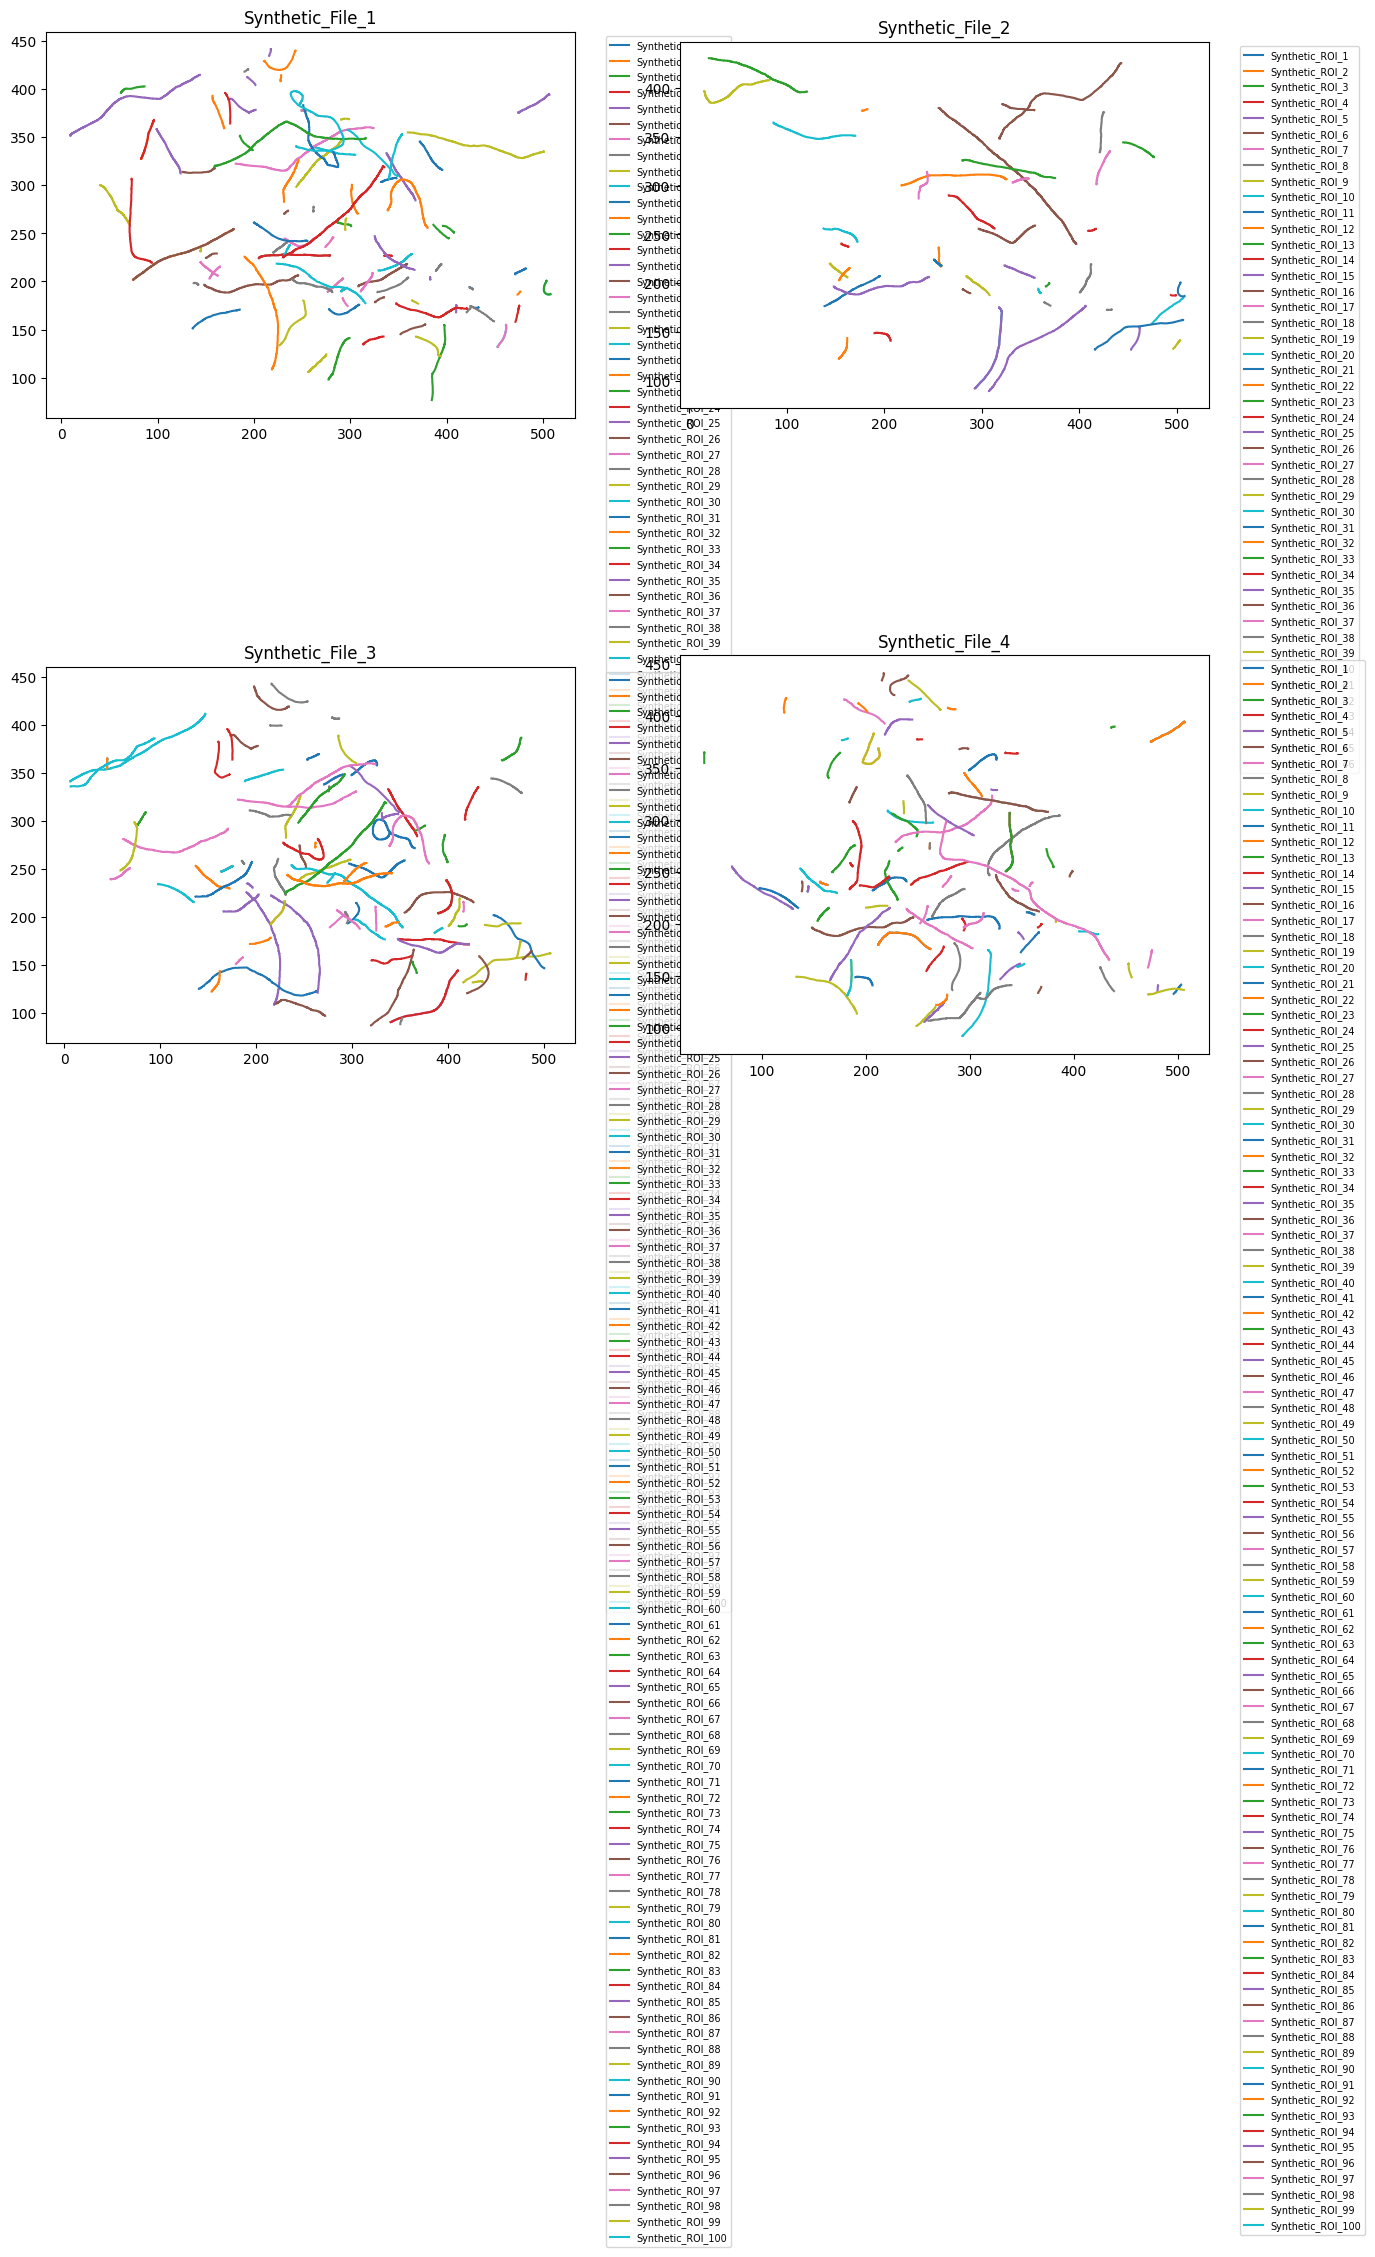

In [ ]:
visualize_roi_data(synthetic_data)

In [ ]:
np.random.normal(0, 1, (10, 2))/100

array([[-1.09325978e-02,  1.59618125e-02],
       [ 4.43976872e-03, -1.26118732e-02],
       [-3.50953274e-03, -1.58249326e-02],
       [ 2.76721289e-05, -1.36805386e-02],
       [ 1.20890454e-02,  2.03153676e-03],
       [-2.58143827e-03,  3.59117318e-03],
       [-1.34860750e-03, -7.91632735e-04],
       [-7.45646044e-03, -2.11828472e-03],
       [-7.32376153e-03,  2.20217279e-02],
       [ 1.70739494e-02, -3.21698305e-03]])

Revised bootstrap synthetic ROI data for 10 images has been generated and saved to bootstrap_synthetic_roi_data_revised.json
Comparison of filament statistics:
{
  "original": {
    "avg_filament_length": 207.97813121272367,
    "std_filament_length": 214.54177328432516,
    "min_filament_length": 11,
    "max_filament_length": 1779,
    "avg_filaments_per_image": 62.875,
    "std_filaments_per_image": 24.846717590056034,
    "min_filaments_per_image": 32,
    "max_filaments_per_image": 100
  },
  "synthetic": {
    "avg_filament_length": 216.32231404958677,
    "std_filament_length": 222.31577626906338,
    "min_filament_length": 11,
    "max_filament_length": 1779,
    "avg_filaments_per_image": 60.5,
    "std_filaments_per_image": 24.059301735503464,
    "min_filaments_per_image": 32,
    "max_filaments_per_image": 100
  }
}


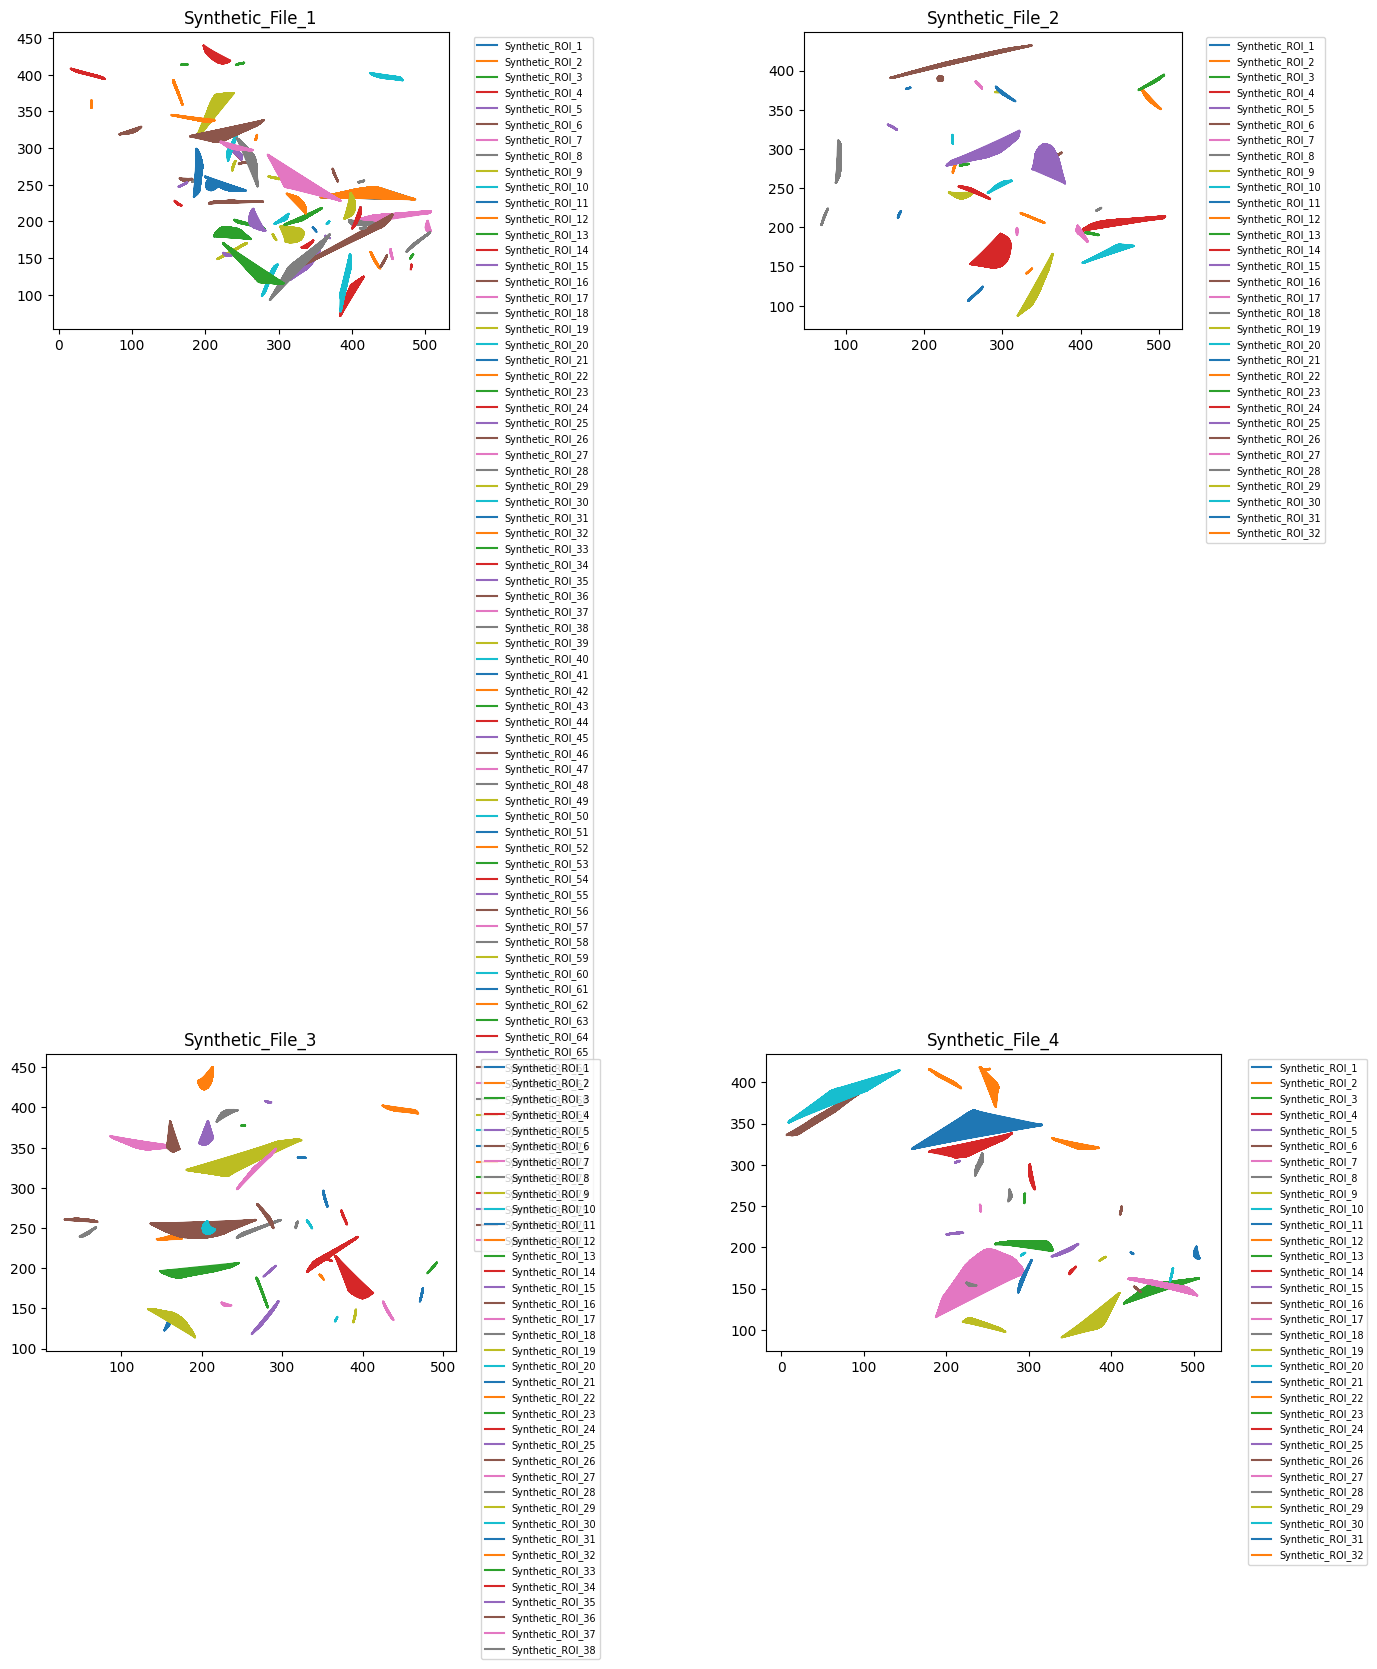

In [ ]:
import json
import numpy as np
import random
from copy import deepcopy

def generate_bootstrap_synthetic_data(json_file_path, num_synthetic_images=5):
    """
    Generate synthetic ROI data using bootstrapping from existing filaments.
    This version samples and shuffles existing filaments without adding variation.

    Args:
    json_file_path (str): Path to the JSON file containing original ROI data.
    num_synthetic_images (int): Number of synthetic images to generate.

    Returns:
    dict: A dictionary containing the synthetic ROI data.
    """
    # Read the original data
    with open(json_file_path, 'r') as f:
        original_data = json.load(f)

    # Extract all filaments and their lengths
    all_filaments = []
    filament_counts = []
    for file_data in original_data.values():
        filament_counts.append(len(file_data))
        for coordinates in file_data.values():
            all_filaments.append(coordinates)

    # Generate synthetic data
    synthetic_data = {}
    for i in range(num_synthetic_images):
        file_name = f"Synthetic_File_{i+1}"

        # Sample the number of filaments for this synthetic image
        num_filaments = np.random.choice(filament_counts)

        file_data = {}
        for j in range(num_filaments):
            roi_name = f"Synthetic_ROI_{j+1}"

            # Randomly select a filament from the pool and make a deep copy
            sampled_filament = deepcopy(random.choice(all_filaments))

            # Shuffle the points in the filament
            random.shuffle(sampled_filament)

            file_data[roi_name] = sampled_filament

        synthetic_data[file_name] = file_data

    return synthetic_data

# The compare_filament_statistics function remains the same as in the previous version

# Example usage:
if __name__ == "__main__":
    json_file_path = "roi_data.json"
    num_synthetic_images = 10

    # Generate synthetic data
    synthetic_data = generate_bootstrap_synthetic_data(json_file_path, num_synthetic_images)

    # Save the synthetic data to a new JSON file
    with open("bootstrap_synthetic_roi_data_revised.json", "w") as f:
        json.dump(synthetic_data, f, indent=2)

    print(f"Revised bootstrap synthetic ROI data for {num_synthetic_images} images has been generated and saved to bootstrap_synthetic_roi_data_revised.json")

    # Compare statistics
    with open(json_file_path, 'r') as f:
        original_data = json.load(f)

    comparison = compare_filament_statistics(original_data, synthetic_data)
    print("Comparison of filament statistics:")
    print(json.dumps(comparison, indent=2))

    # If you have a visualization function, you can use it here
    visualize_roi_data(synthetic_data)

In [ ]:
with open("/content/synthetic_roi_data.json", 'r') as f:
        sdata = json.load(f)

<ipython-input-63-c59280d5ed9f>:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


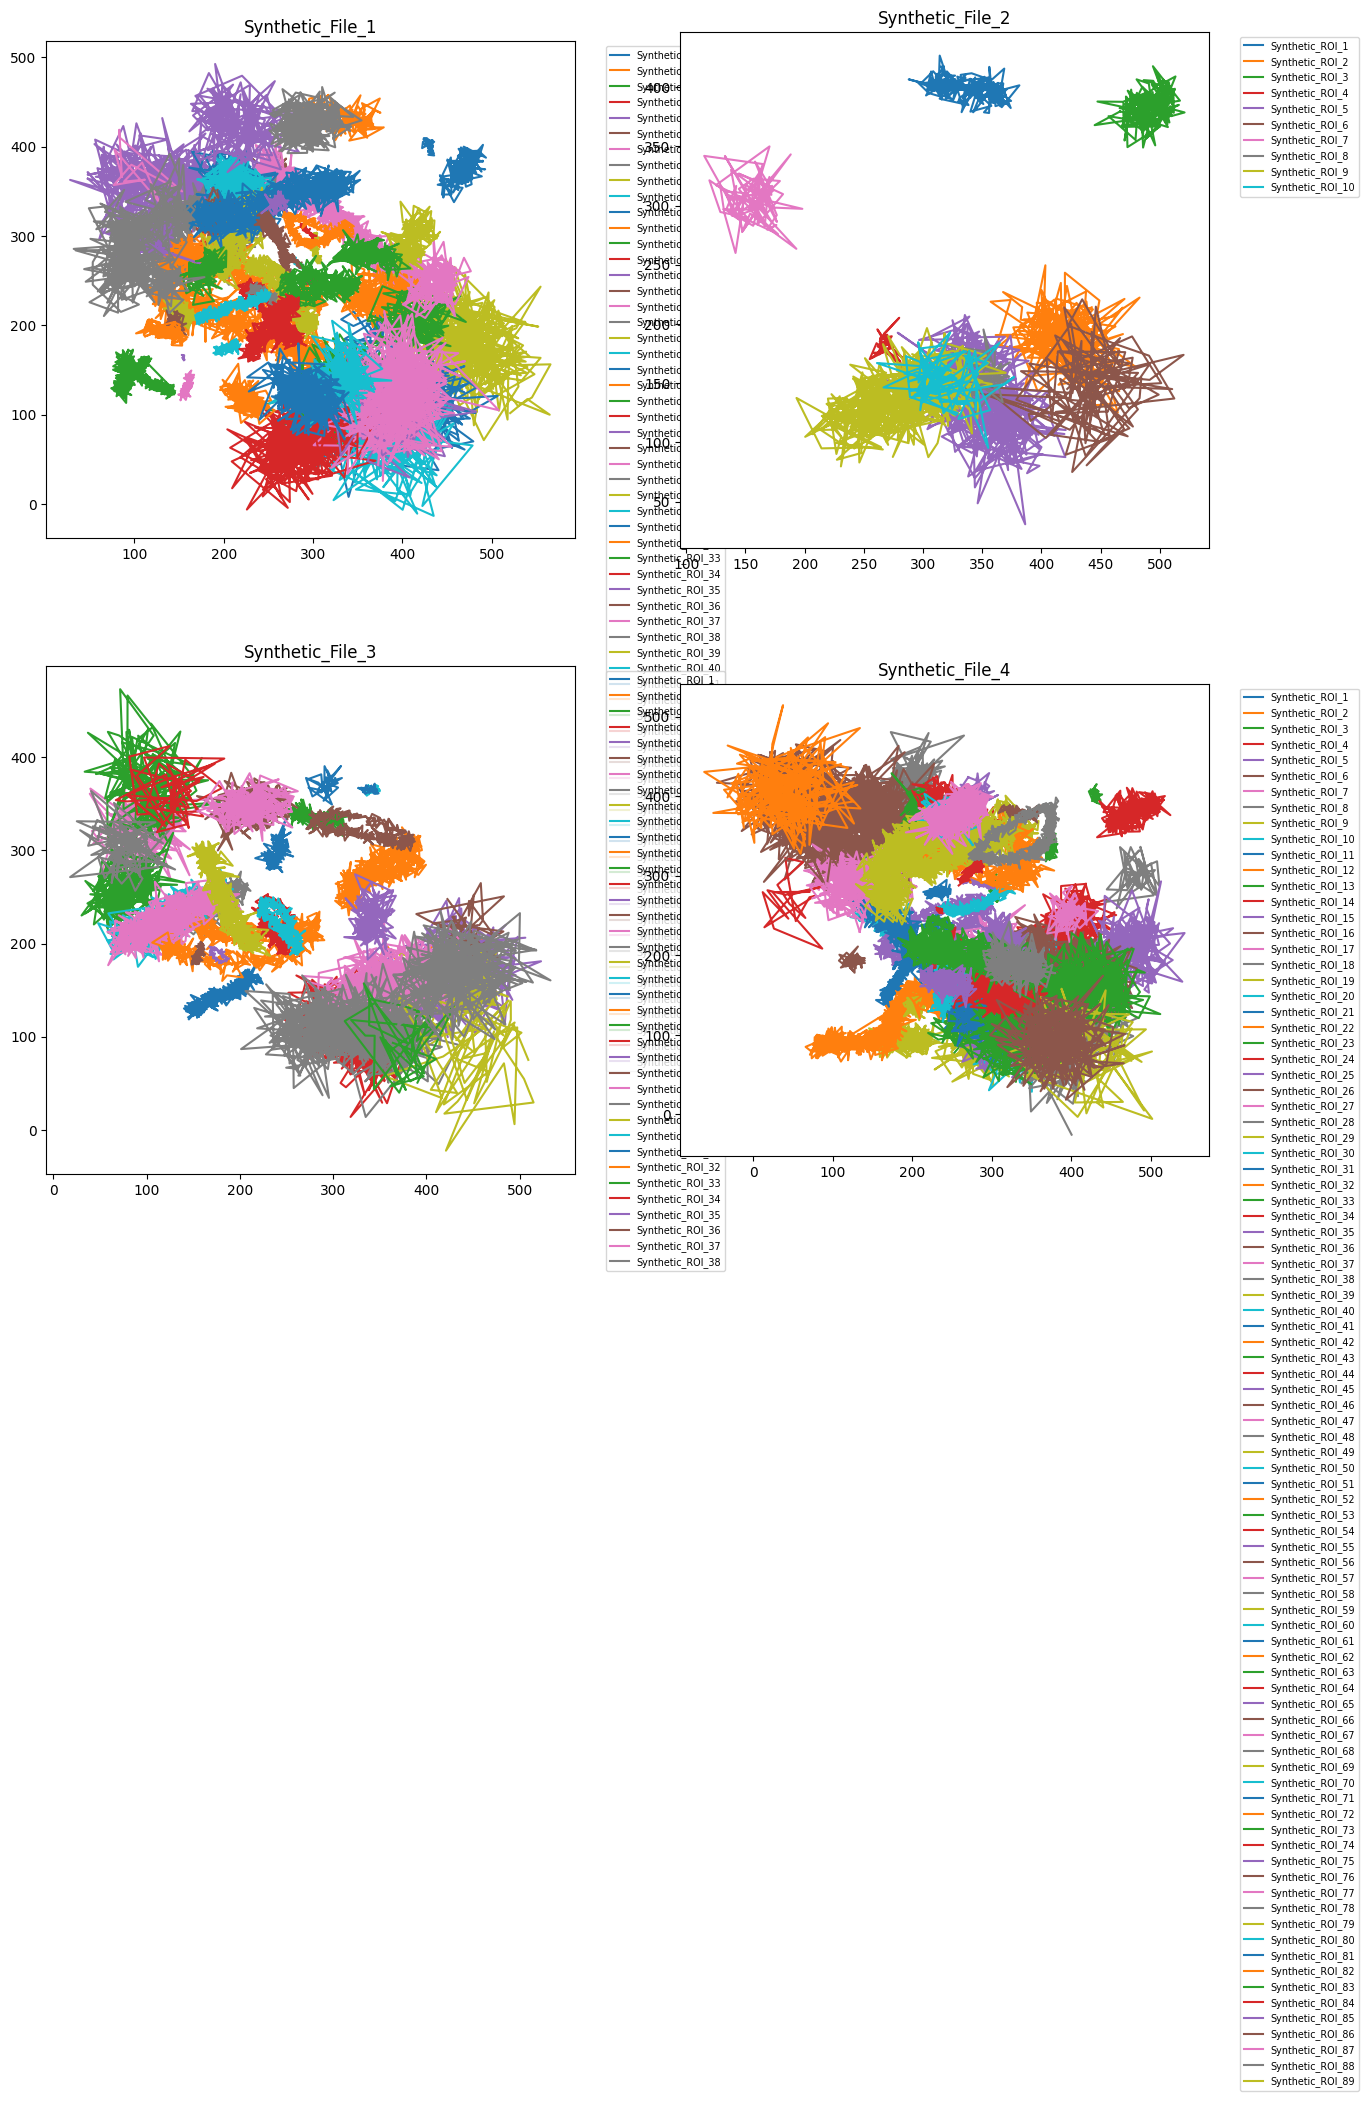

In [ ]:
# visualize_roi_data(sdata)